In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
# Step 1: Load the data
data = fetch_california_housing()
X, y = data.data, data.target

In [4]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
class GradientBoostingRegressorCustom:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y, verbose=True):
        self.models = []
        self.y_pred = np.zeros_like(y, dtype=np.float64)

        for i in range(self.n_estimators):
            residual = y - self.y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=42)
            tree.fit(X, residual)
            update = self.learning_rate * tree.predict(X)
            self.y_pred += update
            self.models.append(tree)

            if verbose and i % 10 == 0:
                mse = mean_squared_error(y, self.y_pred)
                print(f"Iteration {i+1}/{self.n_estimators} - MSE: {mse:.4f}")

    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.float64)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

    def plot_learning_curve(self, X, y):
        errors = []
        y_pred = np.zeros_like(y, dtype=np.float64)

        for tree in self.models:
            update = self.learning_rate * tree.predict(X)
            y_pred += update
            mse = mean_squared_error(y, y_pred)
            errors.append(mse)

        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(errors) + 1), errors, marker='o', color='green')
        plt.title("Gradient Boosting - Learning Curve")
        plt.xlabel("Number of Estimators")
        plt.ylabel("Mean Squared Error")
        plt.grid(True)
        plt.show()


In [7]:
model = GradientBoostingRegressorCustom(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

Iteration 1/100 - MSE: 4.6775
Iteration 11/100 - MSE: 1.0363
Iteration 21/100 - MSE: 0.5005
Iteration 31/100 - MSE: 0.3756
Iteration 41/100 - MSE: 0.3306
Iteration 51/100 - MSE: 0.3079
Iteration 61/100 - MSE: 0.2939
Iteration 71/100 - MSE: 0.2834
Iteration 81/100 - MSE: 0.2748
Iteration 91/100 - MSE: 0.2688


In [8]:
# Step 4: Predict on the test set
y_pred = model.predict(X_test)

In [9]:
# Step 5: Evaluate the model
mse_test = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse_test:.4f}")

Test MSE: 0.2939


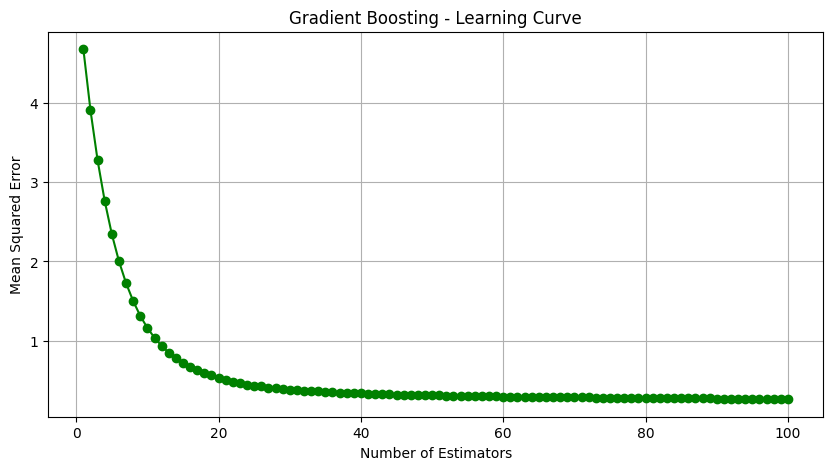

In [10]:
# Step 6: Plot learning curve
model.plot_learning_curve(X_train, y_train)